<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418/22.518 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# **PEC 2. Aprendizaje supervisado: problemas de clasificación**

## Introducción

En este ejercicio práctico estudiaremos cómo utilizar las técnicas previamente estudiadas en teoría para la resolución de poblemas prácticos.

Las competencias asociadas a este módulo son las siguientes:

- Que los estudiantes tengan la capacidad de reunir e interpretar datos relevantes (normalmente dentro de su área de estudio) para emitir juicios que incluyan una reflexión sobre temas relevantes de índole social, científica o ética.
- Identificar y generar nuevas ideas innovadoras que aporten valor económico y/o social.
- Diseñar un marco experimental teniendo en cuenta los métodos más adecuados para la captura, el procesamiento, el almacenamiento, el análisis y la visualización de datos.
- Utilizar de forma combinada los fundamentos matemáticos, estadísticos y de programación para desarrollar soluciones a problemas en el ámbito de la ciencia de los datos.

Y los objetivos que perseguimos con este notebook de prácticas son:

- Interpretar y analizar los resultados de algoritmos de aprendizaje supervisado para problemas de clasificación teniendo en cuenta temas relevantes de índole social, científica o ética.
- Proponer nuevos problemas donde un modelado de los datos usando algoritmos de aprendizaje supervisado puedan aportar valorar económico y/o social.
- Conocer las metodologías y etapas básicas de un proyecto de minería de datos o, en general, de un proyecto de ciencia de datos.
- Realizar un análisis de los resultados obtenidos con los principales métodos de aprendizaje automático en problemas de clasificación usando las métricas de evaluación comunes para estos problemas.
- Conocer los principales métodos de aprendizaje automático en problemas supervisados de clasificación, y saber aplicar el tipo de algoritmo adecuado en cada situación, así como sus puntos fuertes y debilidades.

## Descripción de la PEC

Para ello, en este notebook tendréis que realizar 2 ejercicios que os guiarán en las tareas siguientes:

1. Descargar el conjunto de datos que utilizaremos para trabajar en un problema de clasificación.

2. Cargar el dataset escogido, limpiarlo, pre-procesarlo y dejarlo listo para realizar la clasificación.

3. Entrenar y evaluar clasificadores y optimizar sus parámetros.




## **Ejercicio 1**

En esta PEC utilizaremos el conjunto de datos **Cleveland Heart Disease**, que forma parte del conjunto de datos **Heart Disease**. Podéis obtener más información en el siguiente enlace:

https://archive.ics.uci.edu/dataset/45/heart+disease

Como veréis, el conjunto de datos original incluye cuatro subconjuntos. En esta PEC utilizaremos únicamente la versión procesada de Cleveland, que podéis descargar utilizando el código proporcionado en la siguiente celda.



In [1]:
# Run this cell to load the dataset

!pip3 install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
features = heart_disease.data.features
targets = heart_disease.data.targets

**a) [1.5 puntos]** Una vez cargado el conjunto de datos debemos estudiar su contenido y preprocesar los datos para la aplicación de algoritmos de clasificación:
* ¿Cuántos atributos incluye el conjunto de datos?
* ¿Cuántos valores puede tomar la variable a predecir (*labels, target*) y a qué evento corresponden según la descripción del conjunto de datos?
* ¿Incluye valores nulos? Si los hay eliminad las muestras correspondientes (tened en cuenta que los valores nulos se pueden tratar de varias maneras que este ejercicio no puede abarcar en profundidad).


Para analizar los datos podéis utilizar funciones de la librería *pandas* y atributos de dataframes (*columns, head(), describe(), isnull()*) además de explorar el contenido y los metadatos de *heart_disease*.

In [2]:
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [3]:
targets.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


In [4]:
print("El número de atributos del dataset es:",len(list(features.columns)), "que son:", end=' ')
print(*[columna for columna in features.columns], sep=' ')
print("Más el atributo a predecir. Es decir, un total de:",len(list(features.columns))+1 )

El número de atributos del dataset es: 13 que son: age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
Más el atributo a predecir. Es decir, un total de: 14


In [5]:
print ('El número de posibles valores para la variable/atributo a predecir es:',targets['num'].nunique())

El número de posibles valores para la variable/atributo a predecir es: 5


Siendo el **valor 0** ausencia de enfermedad y en escala del 1 al 4 el estadio de la enfermedad (gravedad).

In [6]:
features.to_csv("df1.csv")
targets.to_csv("df2.csv")

In [7]:
features.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Analizndo los valores mínimos y máximos obtenidos con *describe()* y comparando con la descripción del dataset, el resto de los valores estan dentro de los parámetros que definen cada atributo excepto los identificados como NA.

In [8]:
targets.isna().sum()

num    0
dtype: int64

In [9]:
# guardar posición para elminar las filas correspondientes en el 2º df
posición_Nan = features[features.isnull().any(axis=1)].index
features = features.drop(posición_Nan)
targets = targets.drop(posición_Nan)

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB


Como se pedía en el enunciado, se han eliminado los valores perdidos del dataset sin realizar imputaciones ni ninguna otra alternativa. Se ha eliminado un total de 6 muestras/pacientes.

**b) [1.5 puntos]**
* Obtened y mostrad la cantidad de muestras disponibles para todas las clases incluídas y utilizad un diagrama de barras para representar los valores.
* ¿Os parece un conjunto de datos desbalanceado? ¿Qué particularidades tiene trabajar con un conjunto de datos desbalanceado?
* Agrupad las muestras en dos clases de manera que una sea la ausencia de patología y la segunda clase agrupe a todas las demás. Representar la cantidad de muestras en un nuevo diagrama de barras.

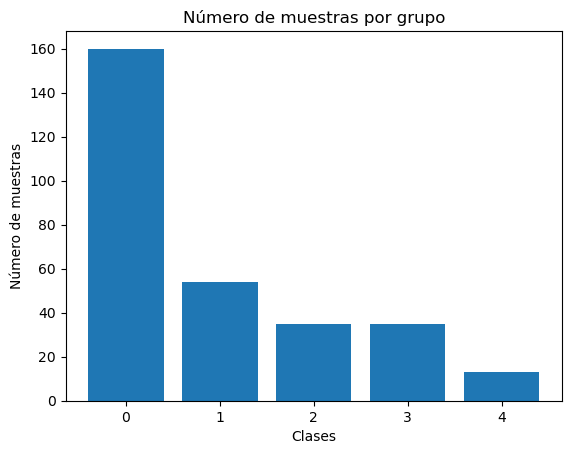

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([features, targets], axis=1)
plt.bar(df.groupby('num').size().index, df.groupby('num').size().values)
plt.title('Número de muestras por grupo')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.show()

Si, está debalanceado como se aprecia en el gráfico. Las clases no están representadas en proporciones **iguales** en el conjunto de datos. Esto puede generar sesgos, falta de precisión o problemas para extrapolar la información. Entre las varias alternativas en estos casos encontramos: reequilibrar las clases/grupos (como se hace en e siguiente apartado), utlizar metrícas de evaluación concretas como *f1*, *AUC-ROC*, etc.

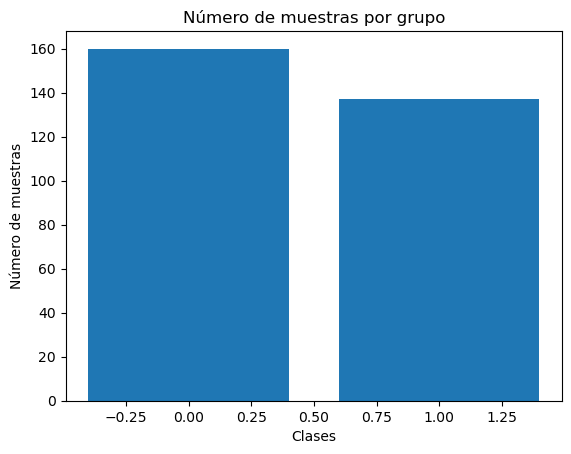

160
137


In [12]:
# nueva variable para crear la nueva agrupación
df['patologia'] =  df['num'].apply(lambda x: 0 if x == 0 else 1)
plt.bar(df.groupby('patologia').size().index, df.groupby('patologia').size().values)
plt.title('Número de muestras por grupo')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.show()
print((df['patologia']==0).sum())
print((df['patologia']==1).sum())

## **Ejercicio 2**

A partir de ahora trabajaremos con los datos resultantes del ejercicio anterior, es decir, con las dos clases descritas.

**a) [1 punto]** Normalizad los datos y separadlos en los conjuntos de entrenamiento y prueba, 70% y 30% respectivamente.

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patologia
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


Como vemos en la teoria "Normalmente, es buena costumbre aplicar un k-fold cross-validation para evaluar un algoritmo, para de esta forma eliminar al máximo posible el sesgo introducido al hacer la separación de datos en train y test." Por lo tanto aplicaremos estos procesos al conjunto de datos de esta tarea.

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patologia
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler

# dividir el dataset
values = df.values
X = values[:,0:13] # drop patologia
y = values[:,14] # variable patologia = df['patologia']

# estandarizar/normalizar los datos
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Dado que al agrupar los diferentes valores de la variable *target* se ha obtenido un conjunto balanceado, se aplica **accuracy**.

In [18]:
from sklearn.model_selection import train_test_split
seed = 42

# se crean los conjuntos de entrenamient y prueba
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

**b) [1 punto]** Con los conjuntos obtenidos, entrenad un SVM y un árbol de decisión.

In [33]:
# SVM
from sklearn import svm

model_SVM = svm.SVC(random_state=seed)
model_SVM.fit(X_scaled_train, y_train)
y_pred_SVM = model_SVM.predict(X_scaled_test)

accuracy-score: 0.817 SVM Model


In [34]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_Tree = DecisionTreeClassifier(random_state=seed)
model_Tree.fit(X_scaled_train, y_train)
y_pred_Tree = model_Tree.predict(X_scaled_test)

accuracy-score: 0.704 SVM Model


**c) [1 punto]** Mostrad las matrices de confusión correspondientes a los resultados de ambos algoritmos y comentadlos.

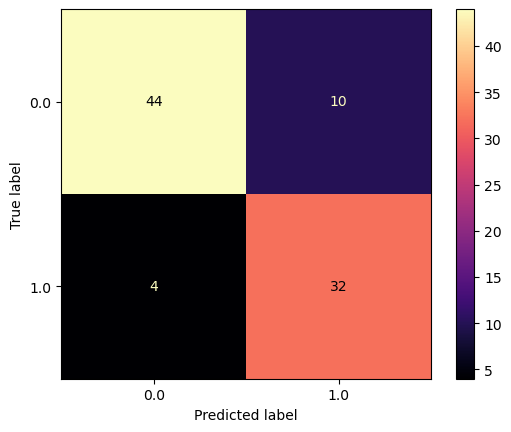

In [35]:
# Matrices
from sklearn import metrics
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred_SVM, y_test, labels=model_SVM.classes_), display_labels=model_SVM.classes_)
cm.plot(cmap="magma")

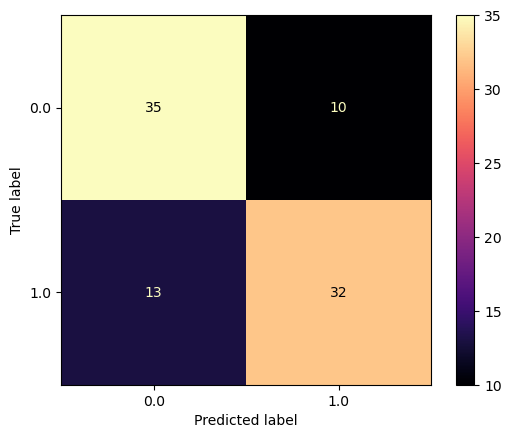

In [36]:
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred_Tree, y_test, labels=model_Tree.classes_), display_labels=model_Tree.classes_)
cm.plot(cmap="magma")

AÑADE TU RESPUESTA AQUÍ


La matriz de confusión para el modelo SVM muestra una mayor cantidad de verdaderos positivos y menos falsos positivos en comparación con el árbol de decisiones, lo que sugiere que el SVM es más eficaz en la identificación correcta de la clase positiva y en evitar la clasificación errónea de la clase negativa. A pesar de que ambos modelos comparten el mismo número de verdaderos negativos y falsos negativos, la capacidad del SVM para maximizar los verdaderos positivos y minimizar los falsos positivos lo destaca como el modelo de mejor rendimiento entre los dos, particularmente en contextos donde los falsos positivos representan un costo más significativo o una mayor preocupación.

**d) [1 punto]** Para los dos clasificadores, obtened precision, recall y f1-score utilizando *sklearn.metrics.classification_report* y comentad los resultados.

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_SVM))

#from sklearn.model_selection import cross_val_score
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
#scores_SVM = cross_val_score(model_SVM, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('accuracy-score: %.3f SVM Model' % scores_SVM.mean()) # report the mean performance

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        48
         1.0       0.89      0.76      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [41]:
print(classification_report(y_test, y_pred_Tree))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75        48
         1.0       0.71      0.76      0.74        42

    accuracy                           0.74        90
   macro avg       0.74      0.75      0.74        90
weighted avg       0.75      0.74      0.74        90



AÑADE TU RESPUESTA AQUÍ

El modelo SVM muestra un rendimiento sólido y equilibrado en la clasificación, con una precisión particularmente alta para la clase positiva y un recall superior para la clase negativa, resultando en puntajes F1 altos para ambas clases, lo que indica un balance adecuado entre precisión y recall. En contraste, el Árbol de Decisiones exhibe una ligera disminución en todas las métricas a través de las clases, con una caída más notable en el recall para la clase positiva, sugiriendo que mientras el Árbol de Decisiones es competente, podría estar perdiendo más casos positivos reales en comparación con el SVM, y esto se refleja en un puntaje F1 globalmente más bajo.

**e) [1.5 puntos]** Utilizando sklearn.model_selection.GridSearchCV optimizar el SVM anterior (que utiliza parámetros por defecto) explorando los parámetros y valores siguientes:
* C: 0.1, 1, 10, 100
* kernel: linear, poly, rbf

Mostrad la mejor combinación de parámetros obtenida.

In [43]:
# ADD AND RUN YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100]
}
clf = GridSearchCV(model_SVM, param_grid) #scoring='f1',
clf_res= clf.fit(X_scaled_train, y_train)

print("Mejor: %f usando %s" % (clf_res.best_score_, clf_res.best_params_))

Mejor: 0.830662 usando {'C': 0.1, 'kernel': 'rbf'}


**f) [0.5 puntos]** Entrenad de nuevo el SVM en los subconjuntos de entrenamiento y prueba del ejercicio 2a pero utilizando los mejores parámetros obtenidos en el apartado anterior. Obtened la matriz de confusion, precisión, recall y f1-score y comparad los resultados con los obtenidos en el apartado 2c.

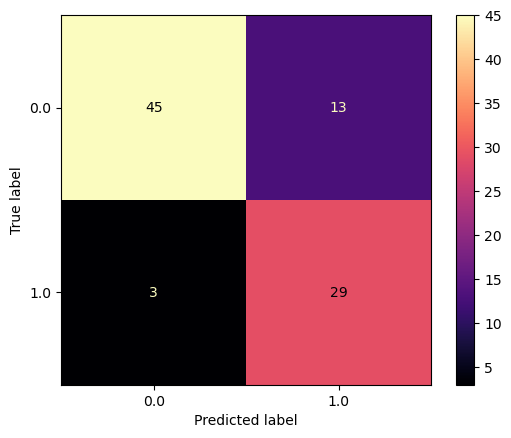

In [44]:
# nuevo_SVM
model_nuevo_SVM = svm.SVC(random_state=seed, C=0.1, kernel='rbf')
model_nuevo_SVM.fit(X_scaled_train, y_train)
y_pred_nuevo_SVM = model_nuevo_SVM.predict(X_scaled_test)

cm = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred_nuevo_SVM, y_test, labels=model_nuevo_SVM.classes_), display_labels=model_nuevo_SVM.classes_)
cm.plot(cmap="magma")

In [45]:
print(classification_report(y_test, y_pred_nuevo_SVM))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85        48
         1.0       0.91      0.69      0.78        42

    accuracy                           0.82        90
   macro avg       0.84      0.81      0.82        90
weighted avg       0.84      0.82      0.82        90



AÑADE TU RESPUESTA AQUÍ

En la configuración inicial (2a), el modelo tiene un elevado recall para la clase negativa y una precisión notable para la clase positiva, implica valores F1 robustos para ambas clases. Tras la optimización, el modelo muestra un incremento en la precisión al clasificar los casos positivos y un aumento en el recall para los casos negativos. Pero, este ajuste reduce la sensibilidad del modelo para la clase positiva (se ve en una disminución en su recall) que implica un F1 más bajo. Este cambio indica que, si bien el modelo optimizado predice con mayor exactitud la clase negativa y muestra precisión al identificar positivos, su capacidad para detectar todos los verdaderos positivos se ve comprometida.

**g) [1 punto]** A la hora de entrenar y evaluar un clasificador es importante llevar a cabo un tratamiento adecuado de los datos y utilizar prodecidimientos y métricas que nos permitan obtener resultados que reflegen correctamente la bondad de los modelos entrenados. Teniendo en cuenta los datos y los atributos incluídos ¿qué otro tipo de análisis llevaríais a cabo para asegurar un mejor estudio de la bondad de los modelos? (Nota: revisad la noción de sesgo algorítmico, *algorithm bias*).


In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patologia
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


AÑADE TU RESPUESTA AQUÍ
La atención al sesgo algorítmico es esencial, especialmente en conjuntos de datos no excesivamente amplios, como en el estudio de enfermedades del corazón, donde el tamaño y la composición de la muestra pueden dictar la aplicabilidad de los resultados. Si un modelo se entrena con datos que no reflejan con precisión la diversidad de la población general, sus predicciones pueden ser válidas solo para los perfiles representados en la muestra, limitando su utilidad clínica a un subconjunto de pacientes y potencialmente perpetuando inequidades existentes. Así como las personas llevan inherentes diversos sesgos—sociales, morales, culturales y religiosos—estos pueden infiltrarse en los algoritmos que crean y ajustan, subrayando la importancia de estrategias de diseño y evaluación que activamente busquen identificar y mitigar tales sesgos para garantizar la equidad y precisión de las herramientas predictivas en la salud y más allá. 
Como vemos en el resumen de los datos existen sesgos, tanto por el target de edad como en el sexo, etc... Siempre los abrá. Voluntariamente o inconscientemente, el problema del sesgo va de la mano del problema de la discriminación (los separa una linea muy fina). Toda sociedad lo sufra y se infiltra en todos los estratos, incluido por supuesto la creación de algoritmos.
Siempre se ha de valorar la importancia que se le da a un proceso que puede ser opaco o complejo de entender. 
Mi opinión al respecto del tipo de análisis no depende tanto del modelo sino de la muestra en primer lugar y en segundo como se utilizan los resultados y que fiabilidad se le dan. 


## **Fuentes y recursos de interés**:
- https://machinelearningmastery.com/standard-machine-learning-datasets/
- https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/

###Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.


In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/model_evaluation.html
https://stackoverflow.com/questions/70514732/understanding-data-balancing-in-sklearn-cross-validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://utsavvora.medium.com/heart-disease-prediction-using-support-vector-machine-svm-34d8c01c596
https://medium.com/analytics-vidhya/implementing-svm-for-performing-classification-and-finding-accuracy-in-python-using-datasets-wine-e4fef8e804b4

https://www.technologyreview.es/s/10924/como-se-produce-el-sesgo-algoritmico-y-por-que-es-tan-dificil-detenerlo
